In [1]:
import pandas as pd
import calendar
# import matplotlib.pyplot as plt
# import seaborn as sns

file_path = "~/Documents/Pipelines/Expense Pipelines/Ver1/first try/end/Justin Expenses 2023 cleaned.csv"
path_prefix = "~/Documents/Pipelines/Expense Pipelines/Ver1/first try/end/"


df =  pd.read_csv(file_path)
# Summary statistics for the entire dataset
summary_stats = df.describe()

print(summary_stats)

# df['Date'] =pd.to_datetime(df['Date'], format='ISO8601')



            Amount
count   698.000000
mean     83.535501
std     266.687752
min       1.000000
25%      12.145000
50%      32.250000
75%      80.000000
max    6000.000000


In [ ]:
 # Total expenses by category
total_by_category =df.groupby('Category')['Amount'].sum()
print(total_by_category)


Category
Account Charges               192.62
Apple Subscriptions           185.95
Clothes/ Shoes/ Jewelry      1854.00
Data                         2921.00
Food                         9881.72
Google 1                       36.00
Hair / Gym                    560.00
Healthcare                    823.30
Miscellaneous                7954.85
Netflix                      1181.04
Outings                       557.00
Rent                        10105.00
Savings/ Investment          3400.00
Tithe                         385.00
Toiletries/Groceries         8291.05
Transportation               9808.25
electricity                   171.00
Name: Amount, dtype: float64


In [ ]:
#  Monthly expenses
df['Date'] =pd.to_datetime(df['Date'], format='ISO8601')

# Extract the month and year from the date column
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

monthly_expenses= df.groupby(['year', 'month'])['Amount'].sum().reset_index()

print(monthly_expenses)


    year  month    Amount
0   2023      1   4860.21
1   2023      2   2740.67
2   2023      3   5479.20
3   2023      4   4708.98
4   2023      5  10280.70
5   2023      6   4764.01
6   2023      7   4665.39
7   2023      8   3424.29
8   2023      9    995.00
9   2023     10   5001.04
10  2023     11   5283.79
11  2023     12   6104.50


In [ ]:
# Average expenses per category
average_by_category = df.groupby('Category')['Amount'].mean()
print(average_by_category)

Category
Account Charges                5.503429
Apple Subscriptions           15.495833
Clothes/ Shoes/ Jewelry      185.400000
Data                         265.545455
Food                          40.833554
Google 1                       9.000000
Hair / Gym                   140.000000
Healthcare                    34.304167
Miscellaneous                107.497973
Netflix                      107.367273
Outings                       92.833333
Rent                        2021.000000
Savings/ Investment          485.714286
Tithe                        385.000000
Toiletries/Groceries         169.205102
Transportation                48.797264
electricity                   85.500000
Name: Amount, dtype: float64


In [ ]:
#  Identify Outliers
# Calculate the z-scores of the amount column to identify outliers
df['z_score'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Filter out transactions with z-scores greater than 3 or less than -3 (considered outliers)
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

print(outliers)

          Date Month_name              Category   Amount  month  year  \
0   2023-01-23        Jan                  Rent  1205.00      1  2023   
89  2023-03-22        Mar                  Rent  1400.00      3  2023   
434 2023-08-23        Aug  Savings/ Investment   1000.00      8  2023   
490 2023-05-10        May                  Rent  6000.00      5  2023   
582 2023-11-18        Nov  Toiletries/Groceries  1047.60     11  2023   
627 2023-12-31        Dec                  Rent  1000.00     12  2023   
656 2023-12-24        Dec  Toiletries/Groceries  1179.81     12  2023   

       z_score  
0     4.205159  
89    4.936352  
434   3.436470  
490  22.184988  
582   3.614956  
627   3.436470  
656   4.110704  


In [ ]:
#Calculate the cumulative sum of expenses over time to see how your spending accumulates:
# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Calculate the cumulative sum of the amount column
df['cumulative_sum'] = df['Amount'].cumsum()

print(df[['Date', 'cumulative_sum']])

          Date  cumulative_sum
32  2023-01-01           55.00
44  2023-01-02          355.00
47  2023-01-02          365.00
70  2023-01-02          384.00
133 2023-01-03          422.00
..         ...             ...
649 2023-12-29        56782.78
650 2023-12-31        57257.78
627 2023-12-31        58257.78
680 2023-12-31        58297.78
697 2023-12-31        58307.78

[698 rows x 2 columns]


In [ ]:
#Pivot Table for Detailed Analysis:
#Create a pivot table to analyze expenses by category and month:
pivot_table = pd.pivot_table(df, values='Amount', index='Category', columns='month', aggfunc='sum', fill_value=0)

print(pivot_table)


month                          1       2        3        4        5       6   \
Category                                                                       
Account Charges             12.90   15.75    29.00    14.00     6.00   21.50   
Apple Subscriptions         58.62   14.00    13.25    12.82    12.19   12.55   
Clothes/ Shoes/ Jewelry    230.00  220.00   250.00   470.00   290.00    0.00   
Data                       300.00    0.00     0.00   600.00   300.00  600.00   
Food                       904.36  680.00   887.90  1084.50  1027.40  578.00   
Google 1                     0.00    0.00     0.00     0.00     0.00    0.00   
Hair / Gym                   0.00   20.00   500.00    20.00     0.00    0.00   
Healthcare                  25.00   44.00   245.00   117.50    32.00  109.50   
Miscellaneous              334.25  260.00   677.50   348.00   971.00  729.00   
Netflix                    133.62  140.00   108.57   101.74    93.61  100.02   
Outings                     57.00    0.0

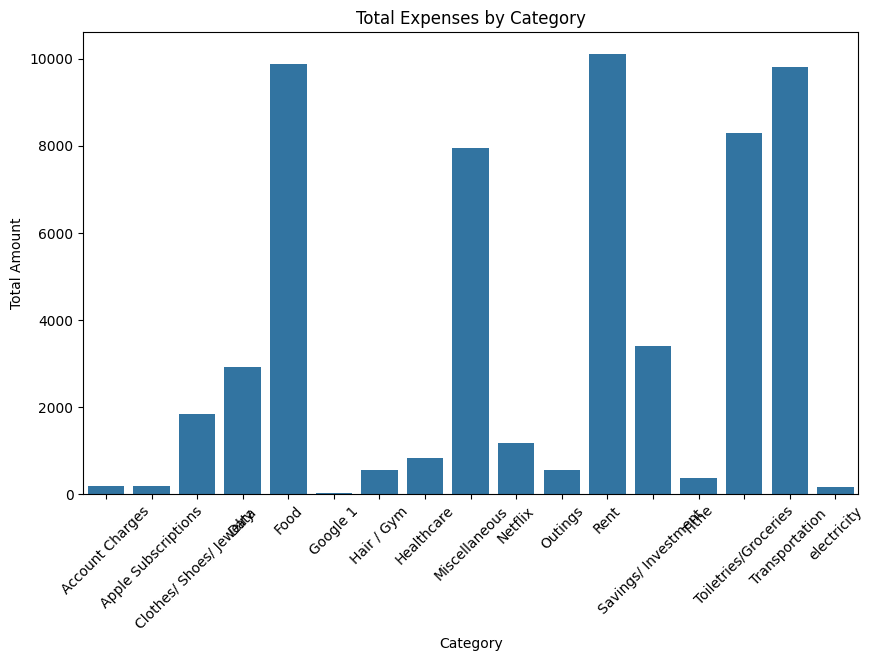

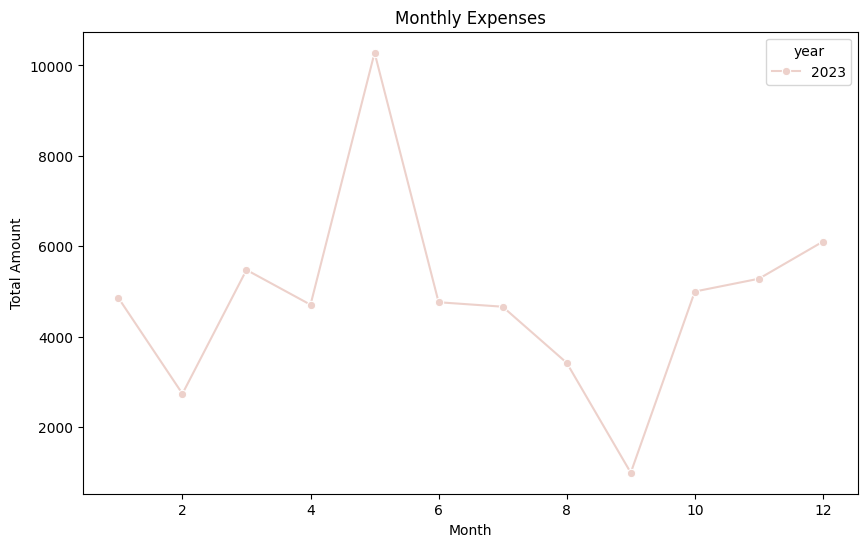

In [ ]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Total expenses by category bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_by_category.index, y=total_by_category.values)
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

# Monthly expenses line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Amount', hue='year', data=monthly_expenses, marker='o')
plt.title('Monthly Expenses')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()